# Convert the HDF5 File

In [21]:
import h5py
import numpy as np
import json
import struct

def convert_hdf5_to_binary(input_file, output_prefix):
  with h5py.File(input_file, 'r') as f:
    train = f['train'][:]
    test = f['test'][:]
    neighbours = f['neighbors'][:]

    train = train.astype(np.float32)
    test = test.astype(np.float32)
    neighbours = neighbours.astype(np.int32)

    metadata = {
      'train_shape': train.shape,
      'test_shape': test.shape,
      'neighbours_shape': neighbours.shape
    }

    with open(f'./{output_prefix}/{output_prefix}_metadata.json', 'w') as mf:
      json.dump(metadata, mf)

    train.tofile(f'./{output_prefix}/{output_prefix}_train.bin')
    test.tofile(f'./{output_prefix}/{output_prefix}_test.bin')
    neighbours.tofile(f'./{output_prefix}/{output_prefix}_neighbors.bin')

In [22]:
convert_hdf5_to_binary('./nytimes-256-angular/nytimes-256-angular.hdf5', 'nytimes-256-angular')

# Plot Final Results

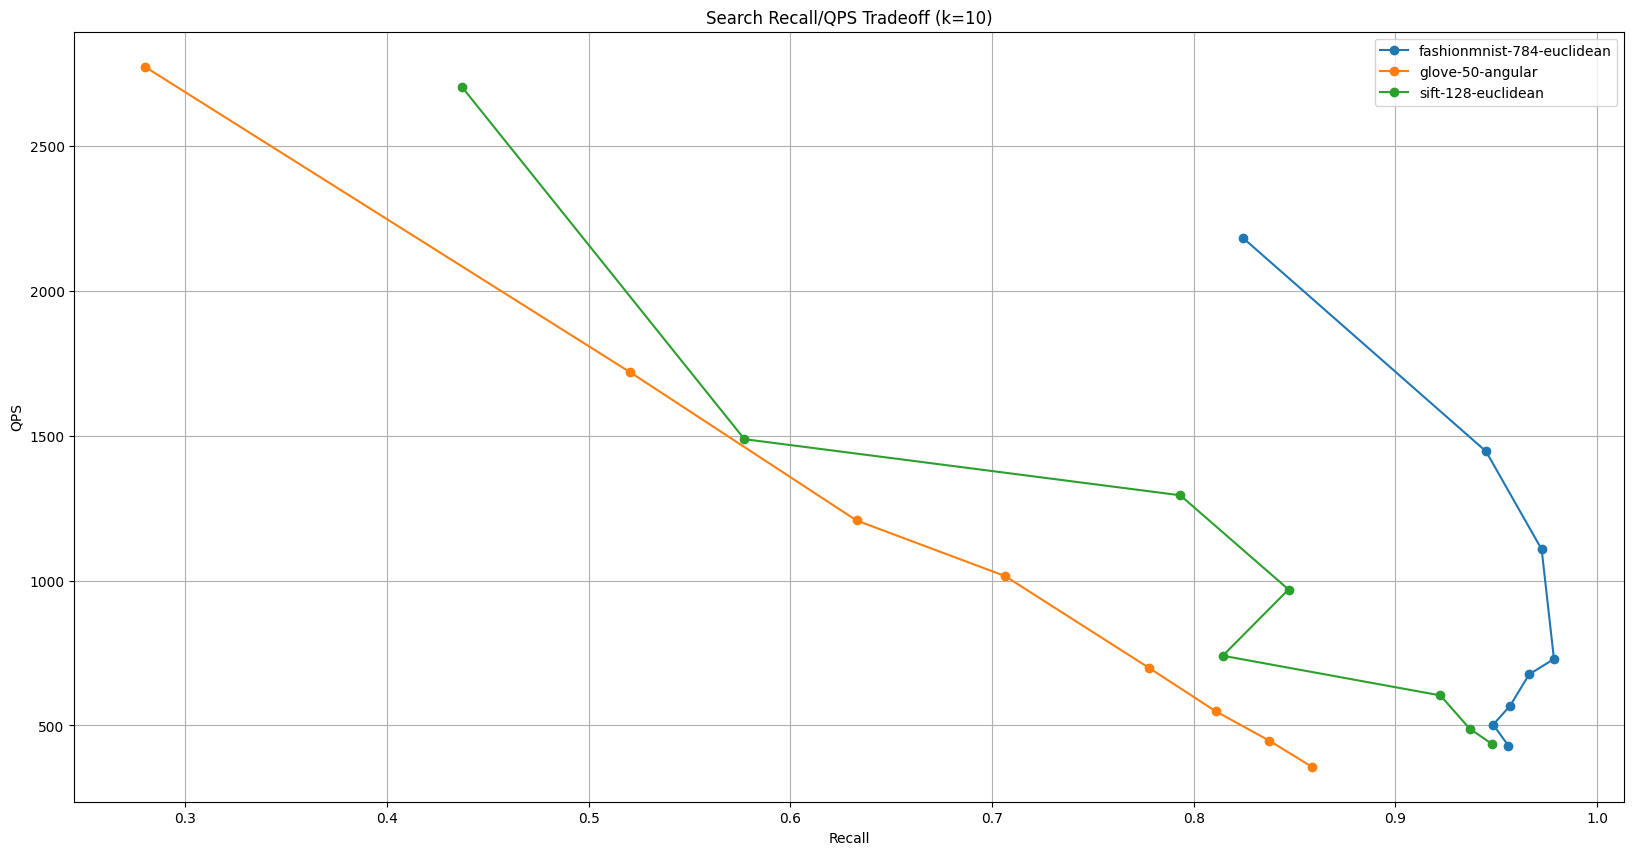

In [1]:
import matplotlib.pyplot as plt

datasets = {
  "fashionmnist-784-euclidean": [
    {"qps": 2182.80, "recall": 0.8245, "param": "efc_256_m_4_ef_32"},
    {"qps": 1446.37, "recall": 0.9449, "param": "efc_256_m_8_ef_32"},
    {"qps": 1107.95, "recall": 0.9725, "param": "efc_256_m_12_ef_32"},
    {"qps": 729.26, "recall": 0.9786, "param": "efc_256_m_16_ef_32"},
    {"qps": 676.25, "recall": 0.9663, "param": "efc_256_m_24_ef_32"},
    {"qps": 568.26, "recall": 0.9569, "param": "efc_256_m_32_ef_32"},
    {"qps": 502.73, "recall": 0.9485, "param": "efc_256_m_40_ef_32"},
    {"qps": 429.91, "recall": 0.9560, "param": "efc_256_m_48_ef_32"},
  ],
  "glove-50-angular": [
    {"qps": 2774.43, "recall": 0.2799, "param": "efc_256_m_4_ef_32"},
    {"qps": 1718.72, "recall": 0.5207, "param": "efc_256_m_8_ef_32"},
    {"qps": 1207.64, "recall": 0.6328, "param": "efc_256_m_12_ef_32"},
    {"qps": 1015.85, "recall": 0.7064, "param": "efc_256_m_16_ef_32"},
    {"qps": 699.18, "recall": 0.7777, "param": "efc_256_m_24_ef_32"},
    {"qps": 549.18, "recall": 0.8108, "param": "efc_256_m_32_ef_32"},
    {"qps": 447.53, "recall": 0.8374, "param": "efc_256_m_40_ef_32"},
    {"qps": 357.37, "recall": 0.8585, "param": "efc_256_m_48_ef_32"},
  ],
  # "nytimes-256-angular": [
  #   {"qps": 6903.80, "recall": 0.0047, "param": "efc_256_m_4_ef_32"},
  #   {"qps": 5657.53, "recall": 0.0081, "param": "efc_256_m_8_ef_32"},
  #   {"qps": 3777.51, "recall": 0.0132, "param": "efc_256_m_12_ef_32"},
  #   {"qps": 3402.97, "recall": 0.0143, "param": "efc_256_m_16_ef_32"},
  #   {"qps": 2355.27, "recall": 0.0216, "param": "efc_256_m_24_ef_32"},
  #   {"qps": 1241.90, "recall": 0.0488, "param": "efc_256_m_32_ef_32"},
  #   {"qps": 806.61, "recall": 0.0772, "param": "efc_256_m_40_ef_32"},
  #   {"qps": 706.77, "recall":  0.0805, "param": "efc_256_m_48_ef_32"},
  # ],
  "sift-128-euclidean": [
    {"qps": 2704.00, "recall": 0.4372, "param": "efc_256_m_4_ef_32"},
    {"qps": 1488.40, "recall": 0.5772, "param": "efc_256_m_8_ef_32"},
    {"qps": 1294.66, "recall": 0.7933, "param": "efc_256_m_12_ef_32"},
    {"qps": 969.23, "recall":  0.8470, "param": "efc_256_m_16_ef_32"},
    {"qps": 740.61, "recall":  0.8144, "param": "efc_256_m_24_ef_32"},
    {"qps": 603.59, "recall": 0.9223, "param": "efc_256_m_32_ef_32"},
    {"qps": 488.67, "recall": 0.9368, "param": "efc_256_m_40_ef_32"},
    {"qps": 435.93, "recall": 0.9479, "param": "efc_256_m_48_ef_32"},
  ],
}

plt.figure(figsize=(20, 10))

for dataset_name, data in datasets.items():
  recall = [d["recall"] for d in data]
  qps = [d["qps"] for d in data]
  params = [d["param"] for d in data]
  
  plt.plot(recall, qps, marker='o', label=dataset_name)
  
  # for i, param in enumerate(params):
  #   plt.annotate(param, (recall[i], qps[i]), textcoords="offset points", xytext=(5, -10), ha='center')

plt.xlabel("Recall")
plt.ylabel("QPS")
plt.title("Search Recall/QPS Tradeoff (k=10)")
plt.legend()
plt.grid(True)
plt.show()